- 와인 데이터 로드

In [3]:
import pandas as pd

red_wine = pd.read_csv("./data/winequality-red.csv", sep=";")
white_wine = pd.read_csv("./data/winequality-white.csv", sep=";")

red_wine["color"] = 1.
white_wine["color"] = 0.

wine = pd.concat([red_wine, white_wine])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


In [4]:
X = wine.drop(["color"], axis=1)
y = wine["color"]

### Pipeline
- 기존 과정은 피쳐스케일링 -> 데이터 분류 -> 모델 학습/예측의 여러 과정이 있었다
- sklearn의 pipeline을 이용하면 이를 간단하게 처리할 수 있다

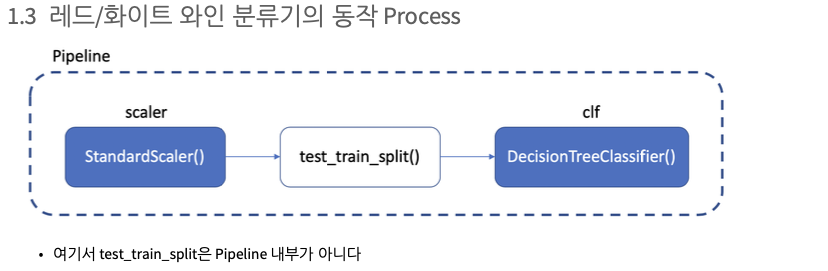

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 피쳐 스케일링
MMS = MinMaxScaler()
MMS.fit(X)
X_mms = MMS.transform(X)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

# 훈련/테스트 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)

# 학습
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

# 예측
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


- 위 방법을 Pipeline을 이용해 구현하면?

In [8]:
from sklearn.pipeline import Pipeline

estimators = [('scaler', StandardScaler()),
             ('clf', DecisionTreeClassifier())]
# 튜플들로 구성된 리스트로 작성해 준다

pipe = Pipeline(estimators)
# pipeline 객체 생성

파이프라인 살펴보기

In [12]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [13]:
pipe.steps[0]

('scaler', StandardScaler())

In [14]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

스텝별로 객체 호출

In [16]:
pipe[0]

StandardScaler()

In [17]:
pipe['scaler']

StandardScaler()

파라미터 설정

In [19]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)
# (스텝 이름 'clf') + (__) + (속성 이름)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

### 파이프라인으로 코드 구현해보기

In [20]:
# 훈련/테스트 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13,
                                                   stratify=y)

# 학습
pipe.fit(X_train, y_train)

# 예측
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9657494708485664
Test Acc :  0.9576923076923077


모델 구조 확인

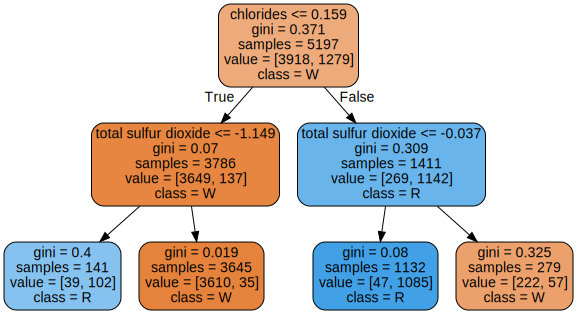

In [23]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(pipe['clf'], feature_names=X_train.columns, class_names=['W', 'R'],
                      rounded=True, filled=True))